# **Кластеризация в задачах машинного обучения**

https://www.kaggle.com/datasets/uciml/electric-power-consumption-data-set?resource=download

https://www.kaggle.com/datasets/joonasyoon/clustering-exercises

https://www.kaggle.com/datasets/hellbuoy/online-retail-customer-clustering

https://habr.com/ru/post/322034/

https://scikit-learn.org/stable/modules/clustering.html#k-means



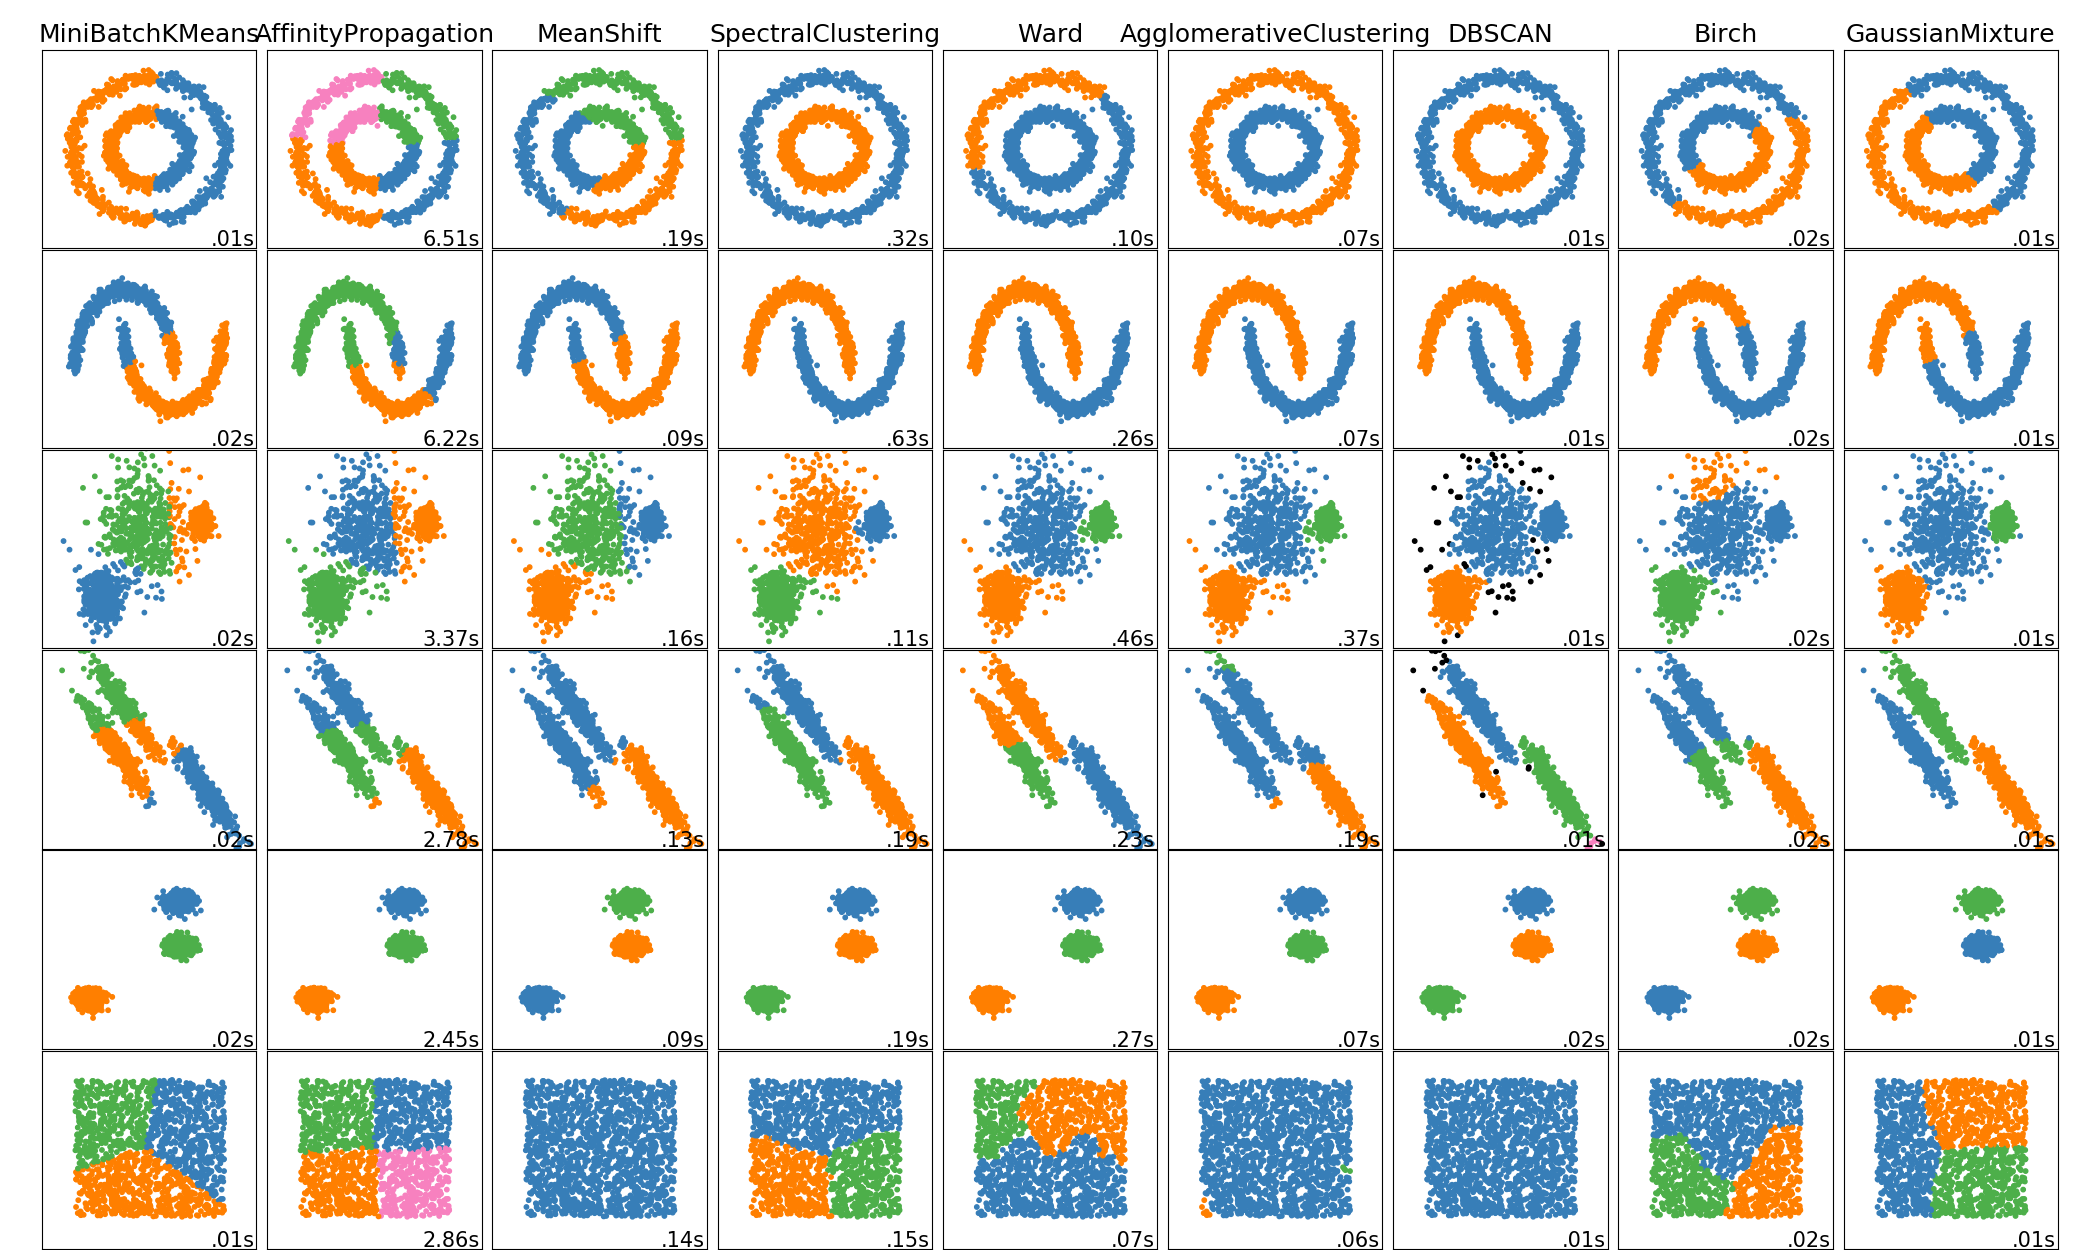

# **Принцип и методы**

Алгоритмы кластеризации работают по принципу определения наиболее похожих друг на друга записей по средним их значениям, и и объединение таких записей в группы. Задача определения наиболее похожих записей и присвоение им метки решается также и другим образом, но ключевой аспект выражается в поиске наиболее вероятных общих закономерностей между прецедентами в исходных данных задачи (строки в кадре данных, картинки в датасете компьютерного зрения, аудиозаписи в обработке звука, предложения или текст в обработке текста).

Среди алгоритмов кластеризации выделяют:

1. K-means (обычный, мини-пакетный, бисекции).
2. Affinity propagation (афинное распространение).
3. Mean-shift (средний сдвиг).
4. Spectral clustering (спектраьная кластеризация).
5. Ward hierarchical clustering (иерархическая кластеризация Ward).
6. Agglomerative clustering (агломеративная кластеризация).
7. DBSCAN (колчиество соседей).
8. OPTICS.
9. Gaussian mixture (смесь нормальных распределений).
10. BIRCH.



https://scikit-learn.org/stable/modules/clustering.html#

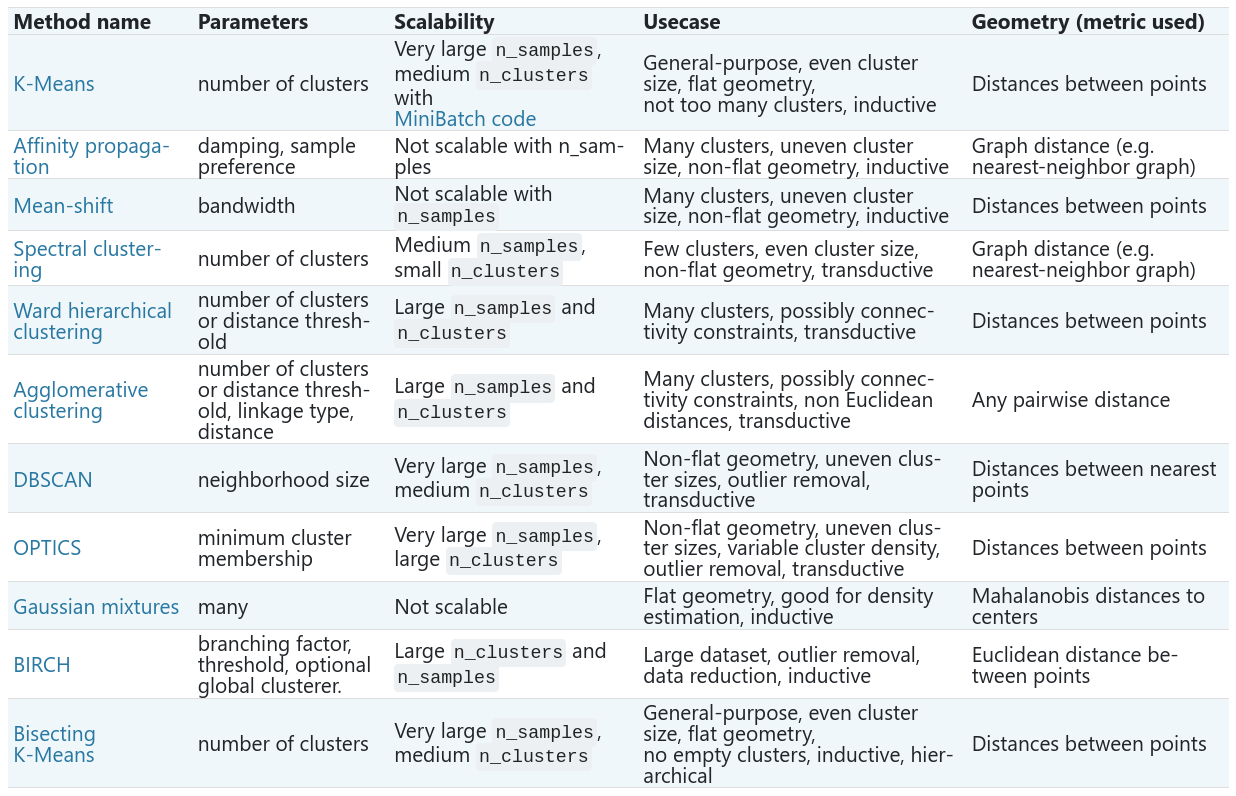

# **K-means**

Алгоритм KMeans группирует данные, пытаясь разделить выборки на n групп с одинаковой дисперсией, сводя к минимуму критерий, известный как инерция или сумма квадратов внутри кластера (см. ниже). Этот алгоритм требует указания количества кластеров. Он хорошо масштабируется для большого количества образцов и используется в самых разных областях применения. 

**Пример.** Кластеризация временных рядов для определения нетипичных периодов, кластеризация транзакций для определения нетипичных транзакций, кластеризация клиентов для определения похожих подгрупп покупателей.

Алгоритм к-средних разделяет набор $X$ из $N$ прецедентов на $K$ непересекающихся кластеров $C$, каждый из которых описывается вектором средних значений признаков $\mu_j$ тех записей, которые относятся к каждому кластеру. Векторы средних значений кластеров называются **центроидами**. Важно, что центроиды не являются записями из выборки $X$, а обладают своими значениями с тем же набором признаков. 

Метод К-средних преследует задачу выбрать центроиды таким образом, чтобы минимизировать общую **инерцию**, или сумму квадратов расстояний точек кластера до точки центроида:

$$\sum_{i=0}^{n}\min_{\mu_j \in C}(||x_i - \mu_j||^2)$$


Инерция предполагает, что кластеры выпуклы и изотропны, что не всегда так. Он плохо реагирует на удлиненные скопления или скопления точек неправильной формы (вогнутые формы скоплений).

Инерция не является нормализованной метрикой: мы просто знаем, что более низкие значения лучше, а ноль оптимален. Но в очень многомерных пространствах евклидовы расстояния имеют тенденцию к завышению (это пример так называемого «проклятия размерности»). Запуск алгоритма уменьшения размерности, такого как анализ главных компонентов (PCA), перед кластеризацией k-средних может облегчить эту проблему и ускорить вычисления.

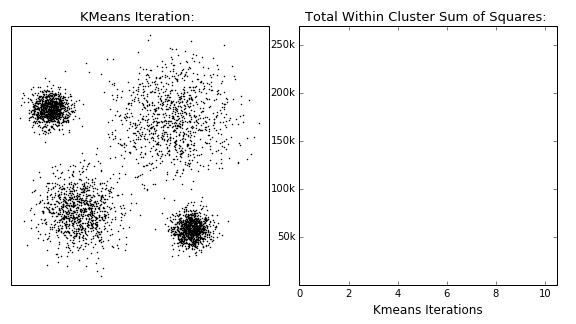

K-средних часто называют алгоритмом Ллойда. В общих чертах алгоритм состоит из трех шагов. 

1. На первом этапе выбираются начальные центроиды, при этом самый простой метод заключается в выборе $k$ выборок из набора данных $X$.

2. После инициализации K-means состоит из цикла между двумя другими шагами. 

- Первый шаг назначает каждому образцу его ближайший центроид. 

- Второй шаг создает новые центроиды, беря среднее значение всех выборок, присвоенных каждому предыдущему центроиду. 

- Вычисляется разница между старым и новым центроидами, и алгоритм повторяет эти последние два шага до тех пор, пока это значение не станет меньше порогового значения. 

3. Другими словами, это повторяется до тех пор, пока центроиды не переместятся значительно.

K-means эквивалентен алгоритму максимизации ожидания с небольшой, равной, диагональной ковариационной матрицей.

При достаточном количестве времени K-средние всегда будут сходиться, однако сходимость часто может приводить к локальному минимуму. Это сильно зависит от инициализации центроидов. В результате вычисление часто выполняется несколько раз с разными инициализациями центроидов. 

Лучшей схемой инициализации центроидов является генерация их на удалении их друг от друга и от данных на окружности вокруг выборки (init = 'k-means++' в scikit-learn). 

# **Affinity propagation**

https://www.geeksforgeeks.org/affinity-propagation-in-ml-to-find-the-number-of-clusters/

AffinityPropagation создает кластеры, отправляя сообщения между парами выборок до сходимости. Затем набор данных описывается с использованием небольшого количества образцов, которые идентифицируются как наиболее репрезентативные для других образцов. 

Сообщения, отправляемые между парами, представляют пригодность одного образца для использования в качестве образца другого, который обновляется в ответ на значения из других пар. Это обновление происходит итеративно до сходимости, после чего выбираются окончательные экземпляры и, следовательно, дается окончательная кластеризация.

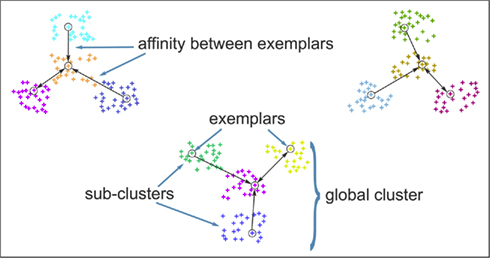

Affinity Propagation может быть интересным, поскольку он выбирает количество кластеров на основе предоставленных данных. Для этой цели двумя важными параметрами являются предпочтение (preferens), которое контролирует количество используемых экземпляров, и коэффициент демпфирования (damping factor), который сглаживает сообщения об ответственности и доступности, чтобы избежать осцилляций численных методов при обновлении этих сообщений.

Основным недостатком Affinity Propagation является его сложность. Алгоритм имеет временную сложность порядка $O(N^2 T)$, где $N$ количество прецедентов или записей в выборке, и $T$ количество итераций до сходимости метода. Кроме того, сложность памяти имеет порядок $O(N^2)$, если используется плотная матрица подобия, но приводима к $O(N)$, если используется разреженная матрица подобия. Это делает Affinity Propagation наиболее подходящим для небольших и средних наборов данных.

Описание алгоритма: Сообщения, отправляемые между точками, относятся к одной из двух категорий. 

- Во-первых, это ответственность $r(i,k)$, которая является накопленным доказательством того, что экземпляр $k$ должен быть образцом для экземпляра $i$. 

- Во-вторых, доступность $a(i, k)$, которая является накопленным свидетельством того, что экземпляр $i$ должен выбрать экземпляр $k$ в качестве своего образца, и учитывает значения для всех других экземпляров, что $k$ должен быть образцом. 

Таким образом, образцы выбираются выборками, если они (1) достаточно похожи на многие экземпляры и (2) выбраны многими экземлярами, чтобы быть репрезентативными сами по себе.

Более формально ответственность экземпляра $k$ за то, что он является образцом экземпляра $i$, определяется следующим образом:

$$r(i, k) \leftarrow s(i, k) - max [ a(i, k') + s(i, k'), \forall k' \neq k ]$$

Где $s(i,k)$ — сходство экземпляров $i$ и $k$. Доступность $k$ в качестве образца экземпляра $i$ определяется выражением:

$$a(i, k) \leftarrow min [0, r(k, k) + \sum_{i'~s.t.~i' \notin \{i, k\}}{r(i', k)}]$$

Для начала все значения для $r$ и $a$ устанавливаются равными нулю, и вычисление каждого повторяется до сходимости. Как обсуждалось выше, во избежание числовых колебаний при обновлении сообщений в итерационный процесс вводится коэффициент демпфирования $\lambda$:

$$r_{t+1}(i, k) = \lambda\cdot r_{t}(i, k) + (1-\lambda)\cdot r_{t+1}(i, k)$$

$$a_{t+1}(i, k) = \lambda\cdot a_{t}(i, k) + (1-\lambda)\cdot a_{t+1}(i, k)$$

где $t$ указывает на количество итераций.


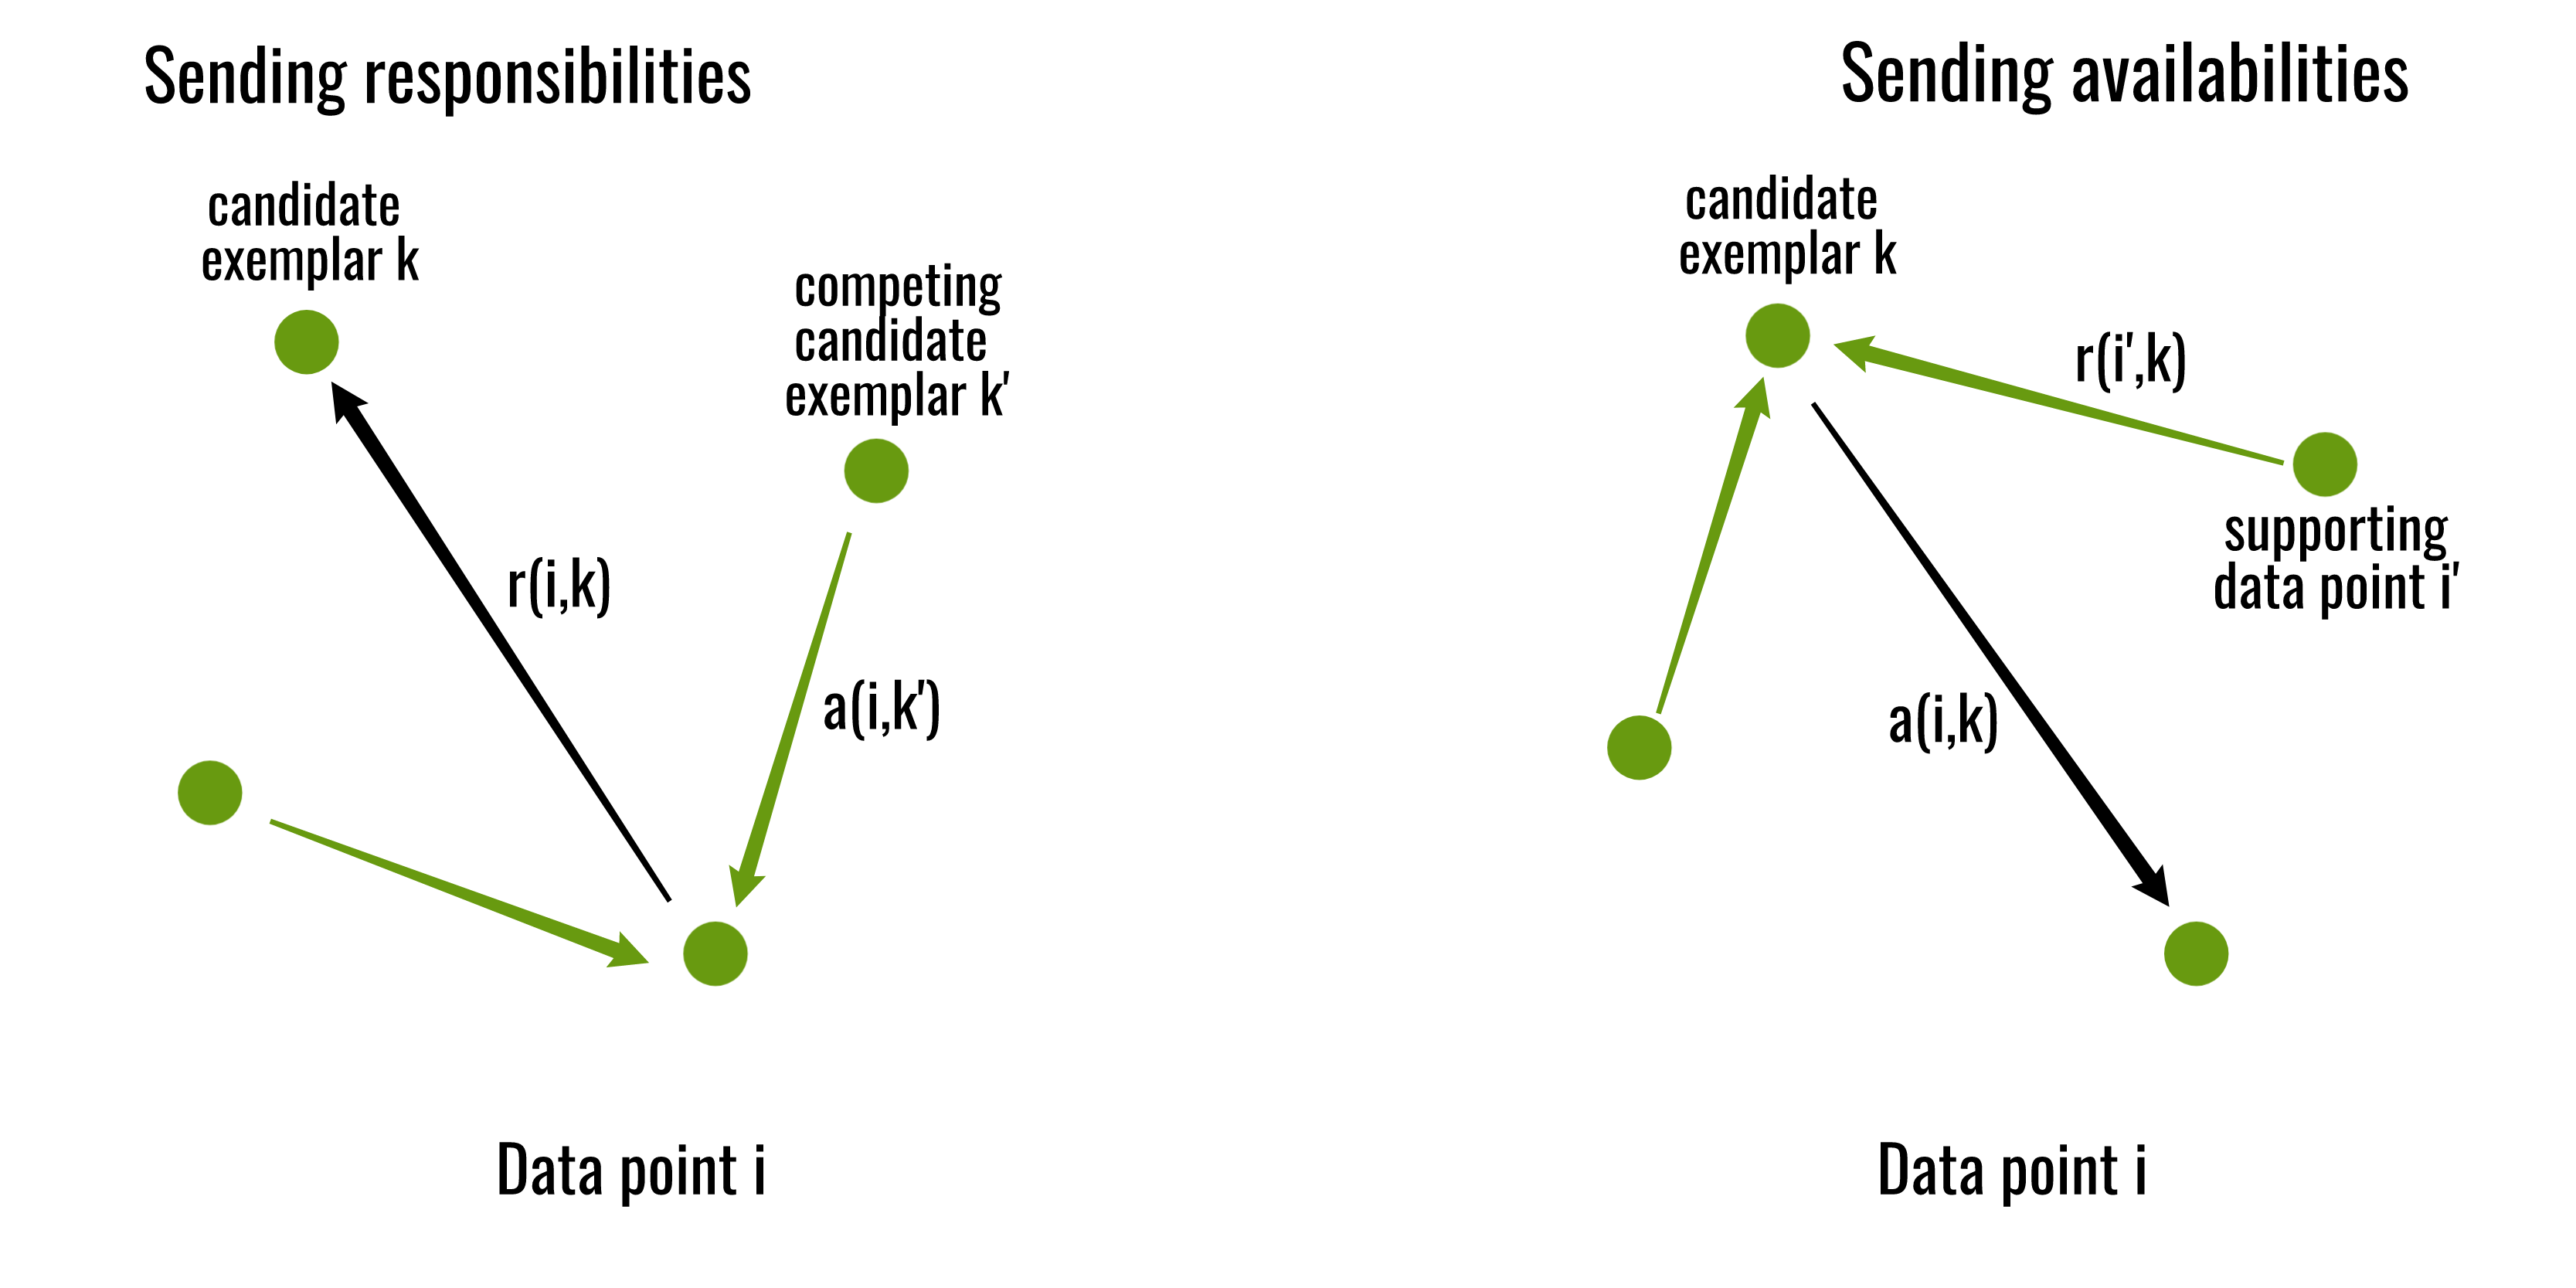

# **Mean shift**

Кластеризация MeanShift направлена ​​​​на обнаружение скоплений объектов в равномерной плотности выборок. Это алгоритм, основанный на центроидах, который работает путем обновления кандидатов на центроиды, чтобы они были средним значением точек в заданной области. Затем эти кандидаты фильтруются на этапе постобработки, чтобы исключить почти дубликаты и сформировать окончательный набор центроидов.

Учитывая центроид-кандидат $x_i$ для итерации $t$, кандидат обновляется в соответствии со следующим уравнением:

$$x_i^{t+1} = m(x_i^t)$$

где $N(x_i)$ — окрестность выборок на заданном расстоянии вокруг $x_i$, а $m$ — вектор среднего сдвига, вычисляемый для каждого центроида, который указывает на область максимального увеличения плотности точек. Это вычисляется с использованием следующего уравнения, эффективно обновляющего центроид, чтобы он был средним значением выборок в его окрестности:


$$m(x_i) = \frac{\sum_{x_j \in N(x_i)}K(x_j - x_i)x_j}{\sum_{x_j \in N(x_i)}K(x_j - x_i)}$$

Алгоритм автоматически устанавливает количество кластеров, вместо того чтобы полагаться на параметр пропускной способности, который определяет размер области для поиска. Этот параметр можно задать вручную, а можно оценить с помощью предоставленной функции Assessment_bandwidth, которая вызывается, если пропускная способность не задана.

Алгоритм не обладает высокой масштабируемостью, так как требует многократного поиска ближайших соседей во время выполнения алгоритма. Алгоритм гарантированно сходится, однако алгоритм прекратит итерацию, когда изменение центроидов будет небольшим.

Маркировка нового образца выполняется путем нахождения ближайшего центроида для данного образца.

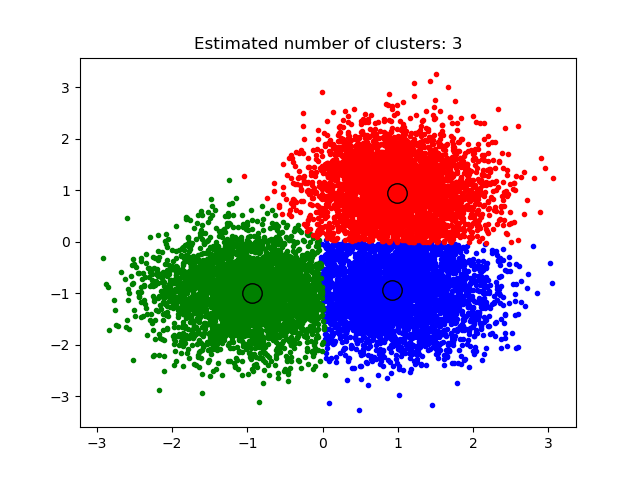

In [13]:
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import Birch
from sklearn.cluster import DBSCAN
from sklearn.cluster import FeatureAgglomeration
from sklearn.cluster import MeanShift
from sklearn.cluster import OPTICS
from sklearn.cluster import SpectralBiclustering, SpectralClustering, SpectralCoclustering

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread

# **Учебная задача**

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/qwerty29544/PY_ML_MIREA_course_2022_2023/main/data/boxes2.csv")

In [3]:
df.head()

x           y  color
0  490.127172  115.109548      1
1  294.267870  158.581321      0
2  440.425055  203.140844      2
3  494.372290  112.077622      1
4  316.361087  238.759800      1

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11271 entries, 0 to 11270
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       11271 non-null  float64
 1   y       11271 non-null  float64
 2   color   11271 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 264.3 KB


In [5]:
df.shape

(11271, 3)

Text(0.5, 1.0, 'Boxes2')

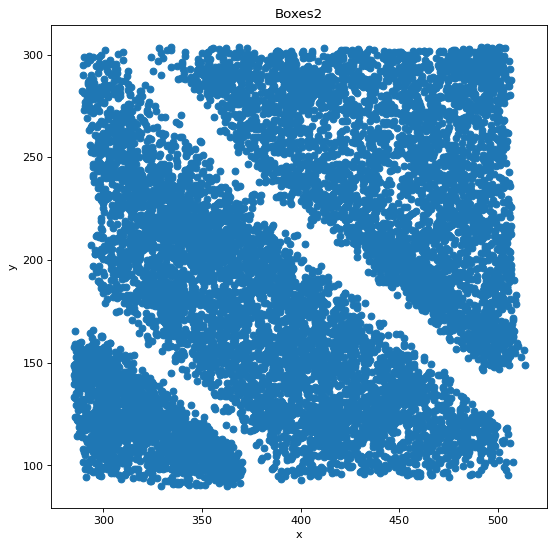

In [6]:
plt.figure(figsize = (8, 8), dpi = 80)
plt.scatter(df['x'], df['y'])
plt.xlabel("x")
plt.ylabel("y")
plt.title("Boxes2")

In [7]:
df.iloc[:, :2]

x           y
0      490.127172  115.109548
1      294.267870  158.581321
2      440.425055  203.140844
3      494.372290  112.077622
4      316.361087  238.759800
...           ...         ...
11266  393.913279  137.685359
11267  483.317363  298.840628
11268  467.365554  131.836571
11269  352.272336  104.748717
11270  382.758061  132.731063

[11271 rows x 2 columns]

## **Kmeans**

In [8]:
kmeans_model = KMeans(3)
kmeans_model.fit(X = df.iloc[:, :2])
preds_clusters = kmeans_model.predict(df.iloc[:, :2])
preds_clusters

array([1, 2, 1, ..., 1, 2, 2])

Text(0.5, 1.0, 'Boxes2')

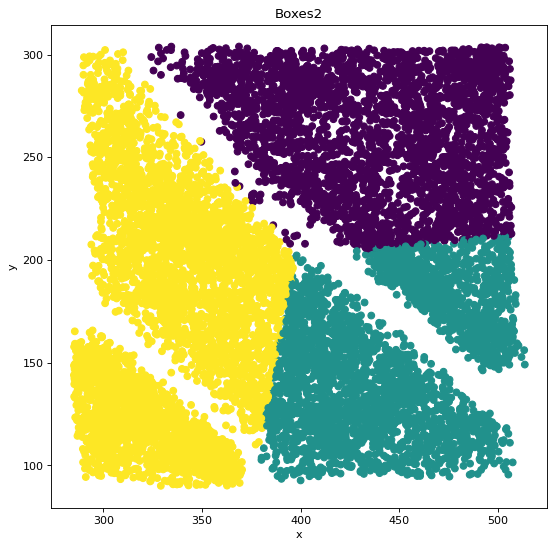

In [9]:
plt.figure(figsize = (8, 8), dpi = 80)
plt.scatter(df['x'], df['y'], c = preds_clusters)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Boxes2")

In [10]:
kmeans_model = KMeans(n_clusters = 3, init = np.array([[100, 300], [200, 400], [250, 450]]))
kmeans_model.fit(X = df.iloc[:, :2])
preds_clusters = kmeans_model.predict(df.iloc[:, :2])
preds_clusters

c:\Users\vasil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1307: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params(X)


array([1, 0, 1, ..., 1, 0, 0])

Text(0.5, 1.0, 'Boxes2')

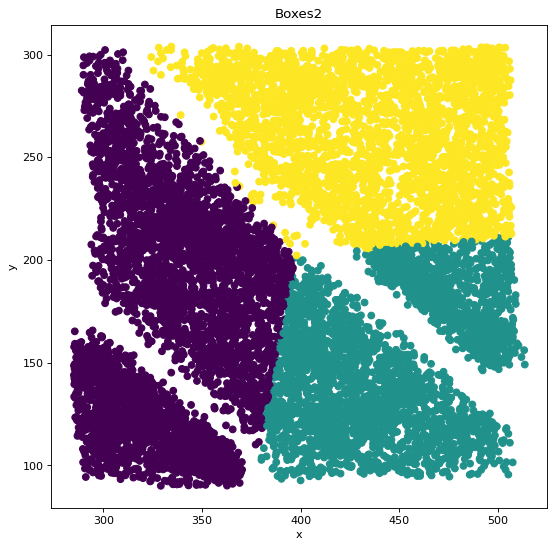

In [11]:
plt.figure(figsize = (8, 8), dpi = 80)
plt.scatter(df['x'], df['y'], c = preds_clusters)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Boxes2")

## **AffinityProp**

In [ ]:
Affinity_model = AffinityPropagation()
Affinity_model.fit(df.iloc[:, :2])
preds_affinity = Affinity_model.predict(df.iloc[:, :2])
preds_affinity

Text(0.5, 1.0, 'Boxes2')

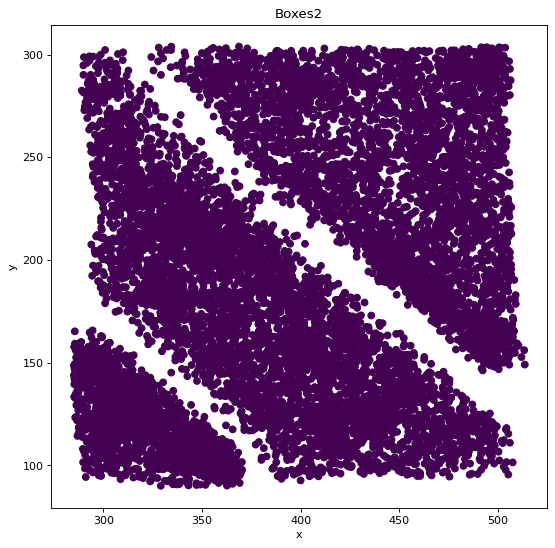

In [ ]:
plt.figure(figsize = (8, 8), dpi = 80)
plt.scatter(df['x'], df['y'], c = preds_affinity)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Boxes2")

## **DBSCAN**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.iloc[:, :2])

In [ ]:
DB_model = DBSCAN(eps=0.1, min_samples=1)
DB_model.fit(df_scaled)
DB_model.labels_

array([0, 1, 2, ..., 0, 1, 0])

In [ ]:
true_vals = df["color"].replace([1, 0],[0, 1])

In [ ]:
np.sum(true_vals == DB_model.labels_) / len(df)

0.9999112767278857

Text(0.5, 1.0, 'Boxes2')

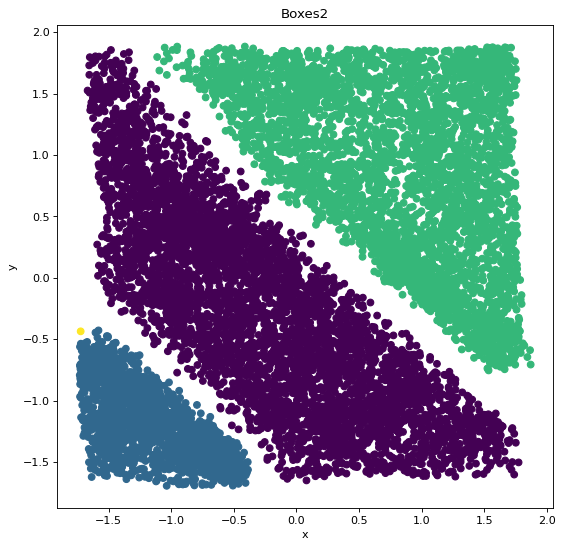

In [ ]:
plt.figure(figsize = (8, 8), dpi = 80)
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c = DB_model.labels_)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Boxes2")

# **Кластеризация цветов изображений**

In [ ]:
shrek = imread("https://64.media.tumblr.com/e206d8305497273917894222344aa3d0/tumblr_pclb2eVgAt1ur5vj7o1_1280.jpg")

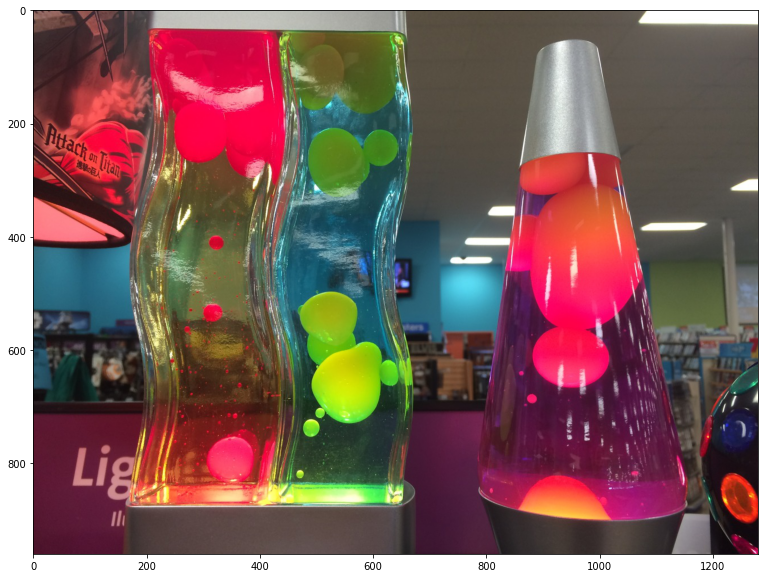

In [ ]:
plt.figure(figsize=(13, 10))
plt.imshow(shrek)

In [ ]:
shrek.shape

(960, 1280, 3)

In [ ]:
flat_shrek = shrek.reshape(shrek.shape[0] * shrek.shape[1], shrek.shape[2]) / 255

In [ ]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, c=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, c=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

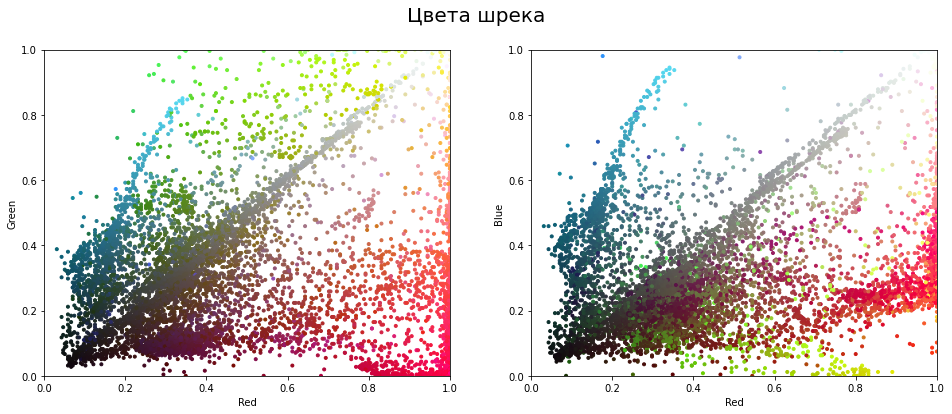

In [ ]:
plot_pixels(flat_shrek, title="Цвета шрека")

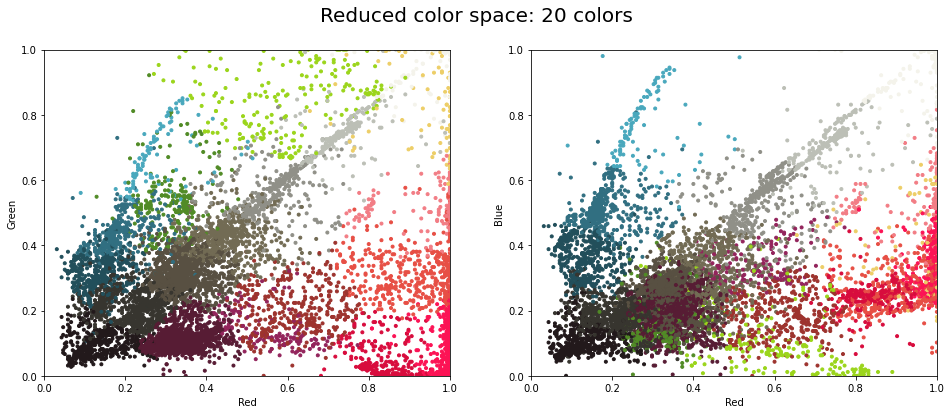

In [ ]:
kmeans = MiniBatchKMeans(20)
kmeans.fit(flat_shrek)
new_colors = kmeans.cluster_centers_[kmeans.predict(flat_shrek)]

plot_pixels(flat_shrek, colors=new_colors,
            title="Reduced color space: 20 colors")

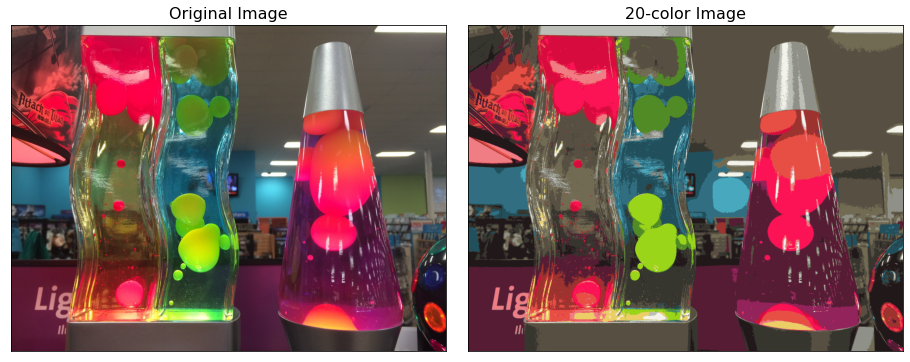

In [ ]:
shrek_recolored = new_colors.reshape(shrek.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(shrek)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(shrek_recolored)
ax[1].set_title('20-color Image', size=16);

Подсчет общей внутрикластерной суммы по кластерам от 1 до 20

In [ ]:
n_colors = 100
inertia_list = []

for n_clusters in range(2, n_colors + 1):
    kmeans_l = MiniBatchKMeans(n_clusters)
    kmeans_l.fit(flat_shrek)
    inertia_list.append(kmeans_l.inertia_)

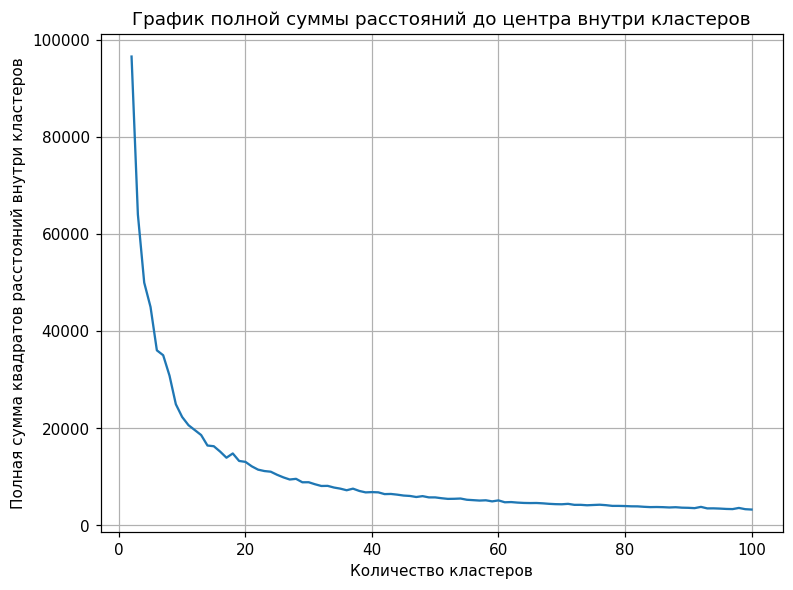

In [ ]:
plt.figure(figsize = (8, 6), dpi = 110)
plt.plot(range(2, n_colors + 1), inertia_list)
plt.grid()
plt.title("График полной суммы расстояний до центра внутри кластеров")
plt.xlabel("Количество кластеров")
plt.ylabel("Полная сумма квадратов расстояний внутри кластеров")
plt.show()

# **Задание №1.**

Вариант №1. https://raw.githubusercontent.com/qwerty29544/PY_ML_MIREA_course_2022_2023/main/data/wave.csv

Вариант №2. https://raw.githubusercontent.com/qwerty29544/PY_ML_MIREA_course_2022_2023/main/data/boxes3.csv

Вариант №3. https://raw.githubusercontent.com/qwerty29544/PY_ML_MIREA_course_2022_2023/main/data/chrome.csv

Вариант №4. https://raw.githubusercontent.com/qwerty29544/PY_ML_MIREA_course_2022_2023/main/data/dart2.csv

Вариант №5. https://raw.githubusercontent.com/qwerty29544/PY_ML_MIREA_course_2022_2023/main/data/face.csv

Вариант №6. https://raw.githubusercontent.com/qwerty29544/PY_ML_MIREA_course_2022_2023/main/data/face.csv

Вариант №7. https://raw.githubusercontent.com/qwerty29544/PY_ML_MIREA_course_2022_2023/main/data/isolation.csv

Вариант №8. https://raw.githubusercontent.com/qwerty29544/PY_ML_MIREA_course_2022_2023/main/data/lines.csv

Вариант №9. https://raw.githubusercontent.com/qwerty29544/PY_ML_MIREA_course_2022_2023/main/data/lines2.csv

Вариант №10. https://raw.githubusercontent.com/qwerty29544/PY_ML_MIREA_course_2022_2023/main/data/network.csv

Вариант №11. https://raw.githubusercontent.com/qwerty29544/PY_ML_MIREA_course_2022_2023/main/data/spiral2.csv

Вариант №12. https://raw.githubusercontent.com/qwerty29544/PY_ML_MIREA_course_2022_2023/main/data/spirals.csv

Вариант №13. https://raw.githubusercontent.com/qwerty29544/PY_ML_MIREA_course_2022_2023/main/data/triangle.csv

Вариант №14. https://raw.githubusercontent.com/qwerty29544/PY_ML_MIREA_course_2022_2023/main/data/un2.csv


1. Выбрать 3 алгоритма кластеризации на выбор для решения поставленной задачи. Один из алгоритмов кластеризации обязательно должен быть вне списка рассмотренных ранее алгоритмов. Для данного метода необходимо привести его теорию для объяснения способа и идеи его работы.

2. Выбрать набор данных исходя из варианта задания.

3. По полученной выборке построить модель кластеризации данных на основе выбранных алгоритмов кластеризации. 

- Построить модели для $k = 2, 3, 4, \dots, 10$ кластеров, если данный параметр имеет место быть в определении методов. 

- Построить график суммы расстояний прецедентов внутри выборки до центра кластеров, по принципу локтя оценить оптимальное количество кластеров.

4. Для полученной модели кластеризации сравнить результаты с априорными данными **color** по функции точности восстановления классов (количество верных совпадений).

- Для реализации метрики, скорее всего придется задавать начальное состояние класетризации, или переопределить метки классов методом **pd.replace()**.

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/qwerty29544/PY_ML_MIREA_course_2022_2023/main/data/face.csv")

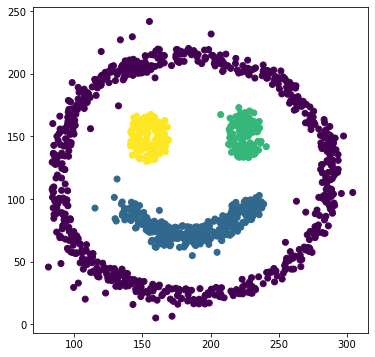

In [ ]:
plt.figure(figsize= (6,6))
plt.scatter(df['x'], df['y'], c = df['color'])

# **Иерархическая кластеризация**

Существует два варианта иерархической кластеризации:


*   агломеративная, в которой алгоритм на каждой итерации объединяет два меньших кластера в один;

*   дивизивная, в которой алгоритм на каждой итерации разбивает один кластер на два более мелких.




Рассмотрим агломеративный подход к кластеризации:


1. Инициализируем наше множество кластеров, каждая точка считается своим кластером. То есть для выборки размера $N$ на первой итерации будет $N$ кластеров. Также входным параметром алгоритму подается метрика расстояния между двумя кластерами. Самой популярной метрикой является расстояние Уорда.
2. На каждой итерации  мы объединяем два кластера в один. Объединяющиеся кластера выбираются в соответствии с наименьшим расстоянием Уорда. То есть в соответствии с выбранным нами расстоянием эти два кластера будут наиболее похожи и поэтому объединяются.
3. Предыдущий шаг повторяется вплоть до объединения всех точек один кластер.

В результате в данном подходе мы можем выбрать любое количество кластеров после завершения процедуры, просто остановив на нужном нам шаге. К тому же данный алгоритм гораздо менее чувствителен к выбору метрики между точками, тогда как другие алгоритмы сильно зависят от этого.

Для визуализации иерархической кластеризации удобно строить дендрограммы, в которых разница между уровнями равна выбранному расстоянию объединяющихся на данном этапе кластеров.

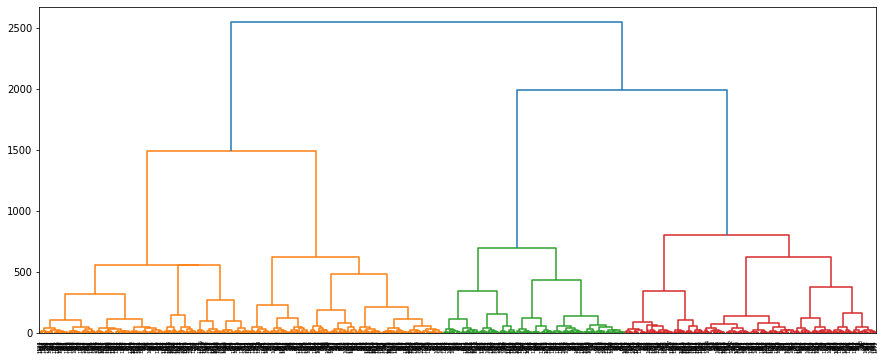

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
fig = plt.figure(figsize=(15, 6))
dendrogram(linkage(df.iloc[:, 1:3], method='ward'))
plt.show()

На ней видно что у нас четыре кластера

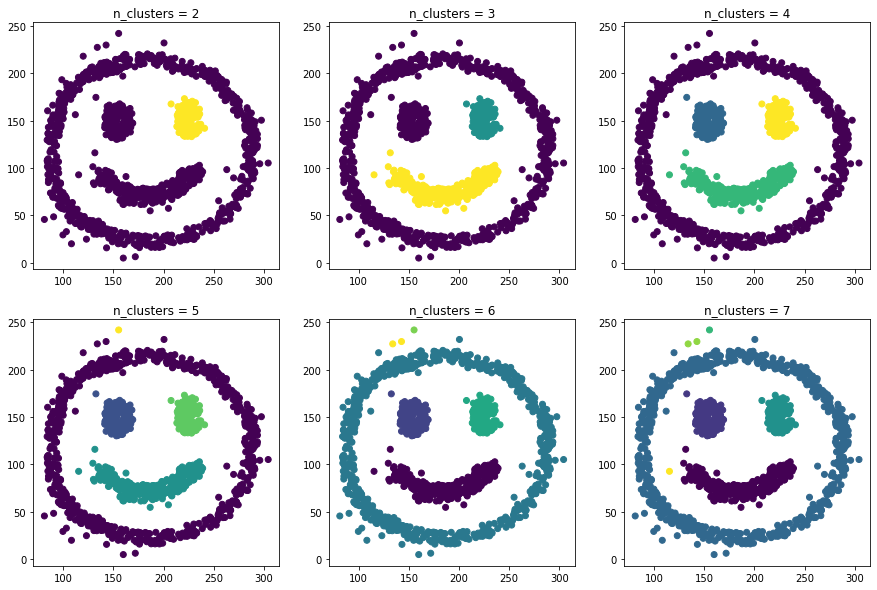

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

plt.figure(figsize= (15,10))

for n_c in range(2,8):
    AgglomerativeClustering_model = AgglomerativeClustering(n_clusters = n_c,  linkage='single')
    clusters = AgglomerativeClustering_model.fit_predict(df.iloc[:, 1:3])
    plt.subplot(2,3, n_c - 1)
    plt.scatter(df['x'], df['y'], c = clusters)
    plt.title('n_clusters = {}'.format(n_c))


In [ ]:
AgglomerativeClustering_model = AgglomerativeClustering(n_clusters = 4,  linkage='single')
res = AgglomerativeClustering_model.fit_predict(df.iloc[:, 1:3])
data = np.array(df['color'])
ar = (res == data)
(len([item for item in ar if item == 1])/len(res))*100



55.53809897879026

# **DBSCAN**

Это алгоритм, основанный на плотности — если дан набор объектов в некотором пространстве, алгоритм группирует вместе объекты, которые расположены близко и помечает как выбросы объекты, которые находятся в областях с малой плотностью (ближайшие соседи которых лежат далеко). Алгоритм имеет два основных гиперпараметра:



*   `eps` &mdash; радиус рассматриваемой окрестности
*   `min_samples` &mdash; число соседей в окрестности



Все точки делятся на основные точки, достижимые по плотности точки и выбросы следующим образом:



*   Точка $p$ является __основной точкой,__ если по меньшей мере `min_samples` точек находятся на расстоянии, не превосходящем `eps` до неё. Говорят, что эти точки достижимы прямо из $p$.

*   Точка $q$ __прямо достижима__ из $p$, если точка $q$ находится на расстоянии, не большем `eps` , от точки $p$ и $p$ должна быть основной точкой.

*   Точка $q$ __достижима__ из $p$, если имеется путь $p_1,…,p_n$ где $p_1=p$ и $p_n=q$, а каждая точка $p_{i+1}$ достижима прямо из $p_i$ (все точки на пути должны быть основными, за исключением $q$)

*   Все точки, не достижимые из основных точек, считаются __выбросами.__
*   Если $p$ является основной точкой, то она формирует кластер вместе со всеми точками (основными или неосновными), достижимые из этой точки. Каждый кластер содержит по меньшей мере одну основную точку. Неосновные точки могут быть частью кластера, но они формируют его «край», поскольку не могут быть использованы для достижения других точек.




In [ ]:
# для начала считаем все наблюдения аномальными
outlier_percentage = 1.

num_clusters = []
anomaly_percentage = []

# берем маленький эпсилон и начинаем увеличивать
eps = 0.05
eps_history = [eps]

while outlier_percentage > 0.1:    
    model = DBSCAN(eps=eps).fit(df.iloc[:, 1:3])
    
    labels = model.labels_
    num_clusters.append(len(np.unique(labels))-1)
    labels = np.array([1 if label == -1 else 0 for label in labels])
    
    # считаем текущий процент "шума"
    outlier_percentage = sum(labels==1) / len(labels)    
    eps += 0.05
    eps_history.append(eps)
    anomaly_percentage.append(outlier_percentage)


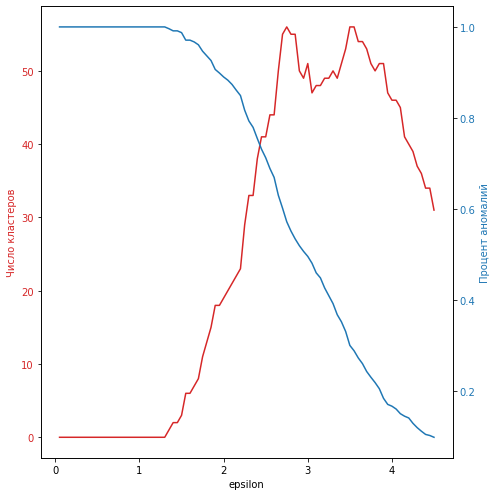

In [ ]:
iterations = eps_history[:-1]

fig, ax1 = plt.subplots(figsize=(7,7))
color = 'tab:red'
ax1.set_xlabel('epsilon')
ax1.set_ylabel('Число кластеров', color=color)
ax1.plot(iterations, num_clusters, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # инициализация второй оси в соотвествии с размером первой

color = 'tab:blue'
ax2.set_ylabel('Процент аномалий', color=color)
ax2.plot(iterations, anomaly_percentage, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout() 
plt.show()

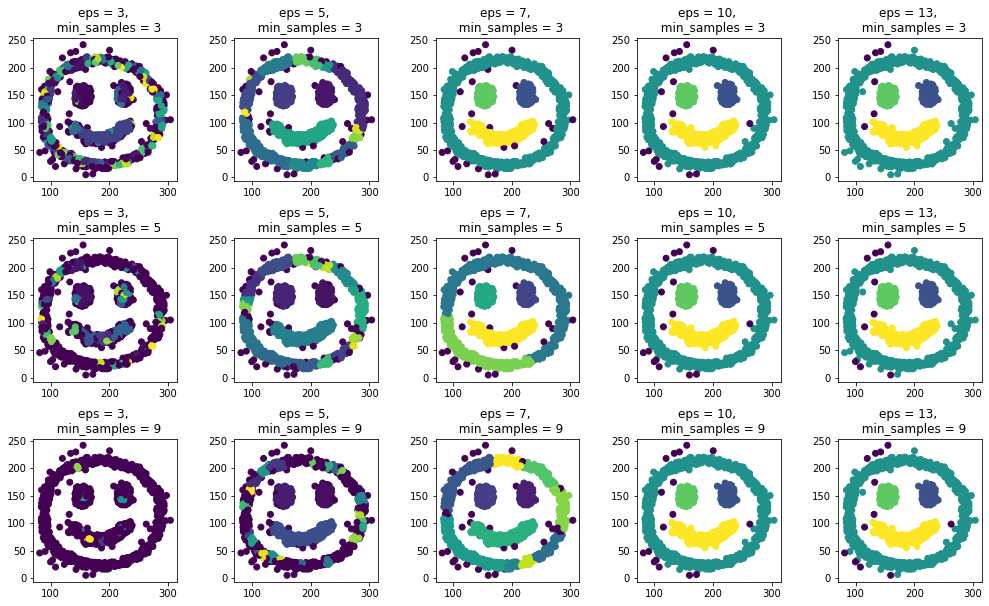

In [ ]:
smpl = [3, 5, 9]
eps = [3, 5, 7, 10, 13]

fig, axs = plt.subplots(len(smpl), len(eps), figsize=(17, 10))
fig.subplots_adjust(hspace = 0.4, wspace=0.4)

for i,samples in enumerate(smpl):
    for j,e in enumerate(eps):
        dbscan = DBSCAN(eps=e, min_samples=samples)
        clusters = dbscan.fit_predict(df.iloc[:, 1:3])
        
        axs[i, j].scatter(df['x'], df['y'], c = clusters)
        axs[i, j].set_title('eps = {}, \n  min_samples = {}'.format(e, samples))


# **K-means**

Метод локтя

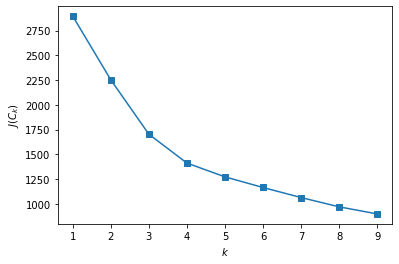

In [ ]:
from sklearn import metrics 
from scipy.spatial.distance import cdist

rg = range(1, 10)
inertia = []
for k in rg:
    kmeans = KMeans(n_clusters=k, random_state=1).fit(df.iloc[:, 1:3])
    inertia.append(np.sqrt(kmeans.inertia_))
    
plt.plot(rg, inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');


In [ ]:
print('$J(C_k)$')

$J(C_k)$


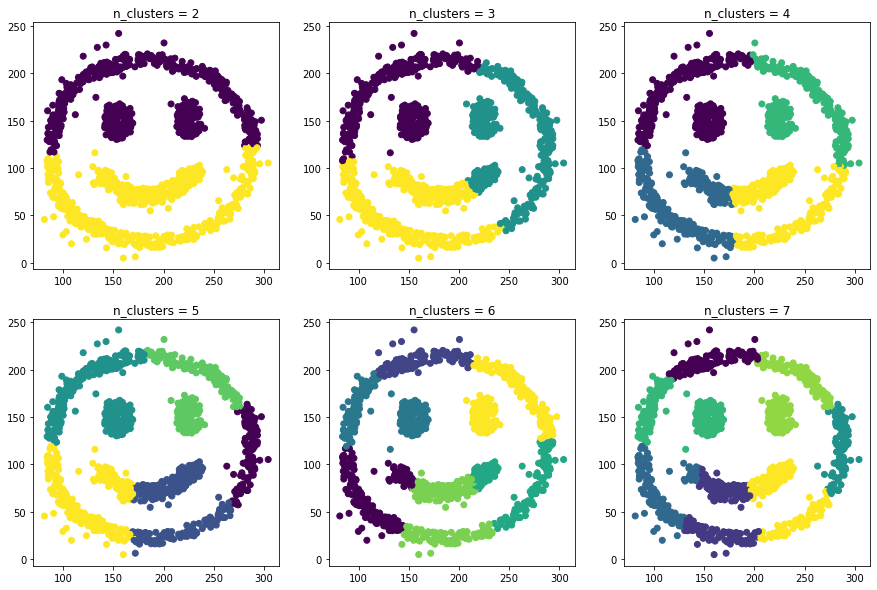

In [ ]:
plt.figure(figsize= (15,10))
for n_c in range(2,8):
    k_means = KMeans(n_clusters = n_c)
    k_means = k_means.fit(df.iloc[:, 1:3])
    clusters = k_means.predict(df.iloc[:, 1:3])
    plt.subplot(2,3, n_c - 1)
    plt.scatter(df['x'], df['y'], c = clusters)
    plt.title('n_clusters = {}'.format(n_c))

# **Задание №2**

1. Выбрать изображение в интернете.

2. Импортировать изображение в рабочую область в качестве переменной

3. На основе 2 алгоритмов с возможностью получения центров кластеров сжать цветовое представление изображения до 10, 20, 40, 60, 80 цветов.

4. Оцените качество сжатия цветовой палитры на каждом из значений гиперпараметра.


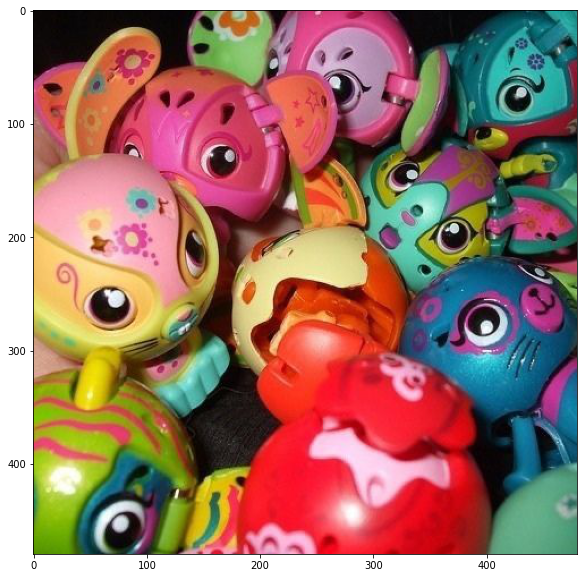

In [ ]:
lamps = imread("https://i.pinimg.com/originals/7a/ad/1a/7aad1a208aa24fe0e34d65fb7ac64409.jpg")
plt.figure(figsize=(13, 10))
plt.imshow(lamps)

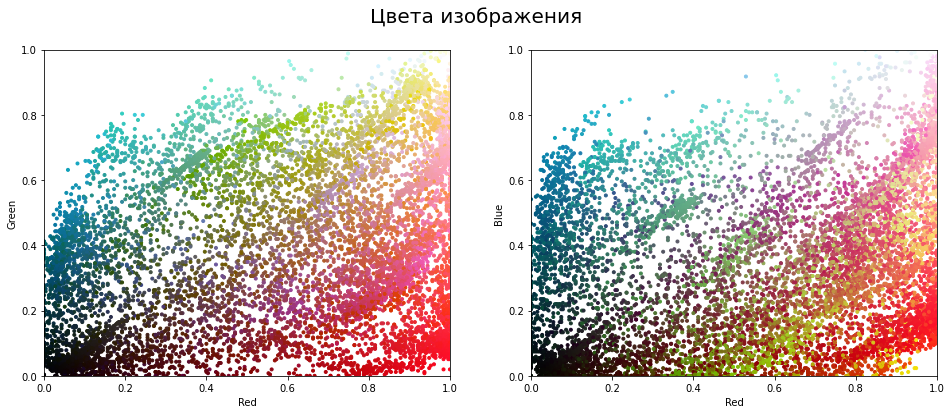

In [ ]:
flat_lamps = lamps.reshape(lamps.shape[0] * lamps.shape[1], lamps.shape[2]) / 255
plot_pixels(flat_lamps, title="Цвета изображения")

Сжатие изображения с помощью k-means

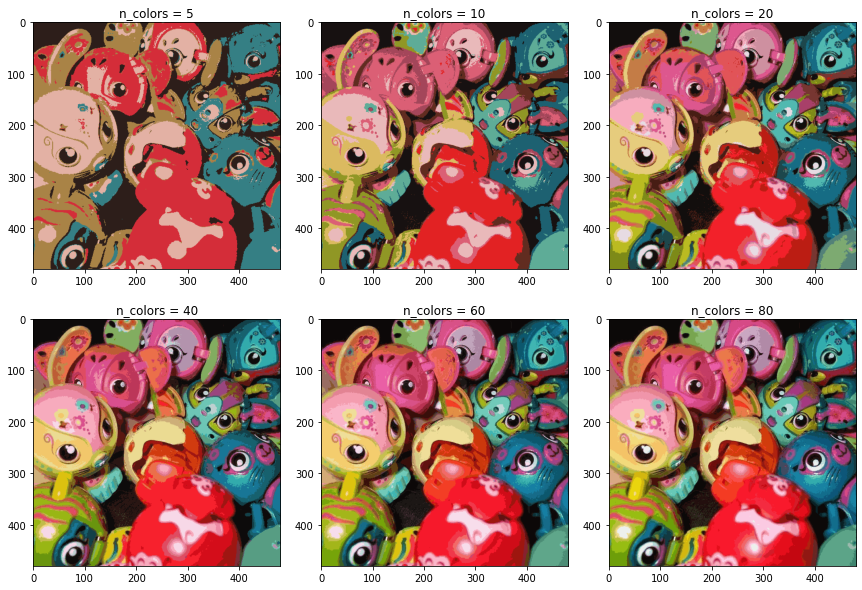

In [ ]:
fig, axs = plt.subplots(2,3,  figsize=(15, 10))
axs = axs.flatten()
fig.subplots_adjust(wspace = 0.1, hspace = 0.2)
colors = [5, 10, 20, 40, 60, 80]
for i, n_c in enumerate(colors):
    k_means = MiniBatchKMeans(n_clusters = n_c)
    k_means = k_means.fit(flat_lamps)
    new_colors = k_means.cluster_centers_[k_means.predict(flat_lamps)]
    lamps_recolored = new_colors.reshape(lamps.shape)
    axs[i].imshow(lamps_recolored)
    axs[i].set_title('n_colors = {}'.format(n_c))
    